In [1]:
import os


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, LabelBinarizer
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, activation, Input, Bidirectional, GRU, LSTM, Dropout, Embedding, ConvLSTM1D, Conv1D,Flatten, MaxPooling1D, SpatialDropout1D, InputLayer

In [4]:
print(tf.__version__)

2.10.0


In [6]:
df_32 = pd.read_csv("datasets-for-VANET-master/datasets-for-VANET-master/32/32V_10PPS_Processed_C30_disc.csv", header=None)
df_32.head()

,0,1,2,3,4,5,6,7,8
0,3,189,187,1859,9.941176,17.056668,34.451336,355.306833,30000
1,3,189,187,1859,9.941176,19.017631,34.451336,109.731664,40000
2,3,189,187,1859,9.941176,34.874903,34.451336,22.972370,20000
3,3,96,94,936,9.957447,6.678918,32.171998,158.660533,40000
4,3,3,1,3,3.000000,11.836256,0.782531,502.115994,20000


In [7]:
df_64 = pd.read_csv("datasets-for-VANET-master/datasets-for-VANET-master/64/64V_10PPS_Processed_C63_disc.csv", header=None)
df_128 = pd.read_csv("datasets-for-VANET-master/datasets-for-VANET-master/128/128V_10PPS_Processed_C105_disc.csv", header=None)
df_Bolgona = pd.read_csv("datasets-for-VANET-master/datasets-for-VANET-master/Bologna/Bologna_10PPS_Processed_4_513_disc.csv",
                         header=None)
df_Erlangen = pd.read_csv(
    "datasets-for-VANET-master/datasets-for-VANET-master/Erlangen/Erlangen_10PPS_Processed_C150_disc.csv", header=None)

In [8]:
mergedDf = pd.concat([df_32, df_64, df_128, df_Bolgona, df_Erlangen], ignore_index=True)
mergedDf.tail()

,0,1,2,3,4,5,6,7,8
1857,795,803,9,73,8.111111,3.113066,16.876904,91.312845,30000
1858,796,796,1,1,1.000000,3.180732,2.024479,159.505698,20000
1859,796,803,8,70,8.750000,3.098926,16.876904,165.988660,30000
1860,796,803,8,67,8.375000,3.100116,16.876904,168.901338,30000
1861,800,803,4,28,7.000000,3.095410,16.876904,173.784501,30000


In [9]:
mergedDf.shape

(1862, 9)

In [10]:
columnNames = ['Start time', 'End time', 'Time Period', 'Packets', 'Rate', 'Sender', 'Receiver', 'Actual Distance',
               'Severity']
mergedDf.columns = columnNames
mergedDf.head()

,Start time,End time,Time Period,Packets,Rate,Sender,Receiver,Actual Distance,Severity
0,3,189,187,1859,9.941176,17.056668,34.451336,355.306833,30000
1,3,189,187,1859,9.941176,19.017631,34.451336,109.731664,40000
2,3,189,187,1859,9.941176,34.874903,34.451336,22.972370,20000
3,3,96,94,936,9.957447,6.678918,32.171998,158.660533,40000
4,3,3,1,3,3.000000,11.836256,0.782531,502.115994,20000


In [11]:
mergedDf.dropna(inplace=True)

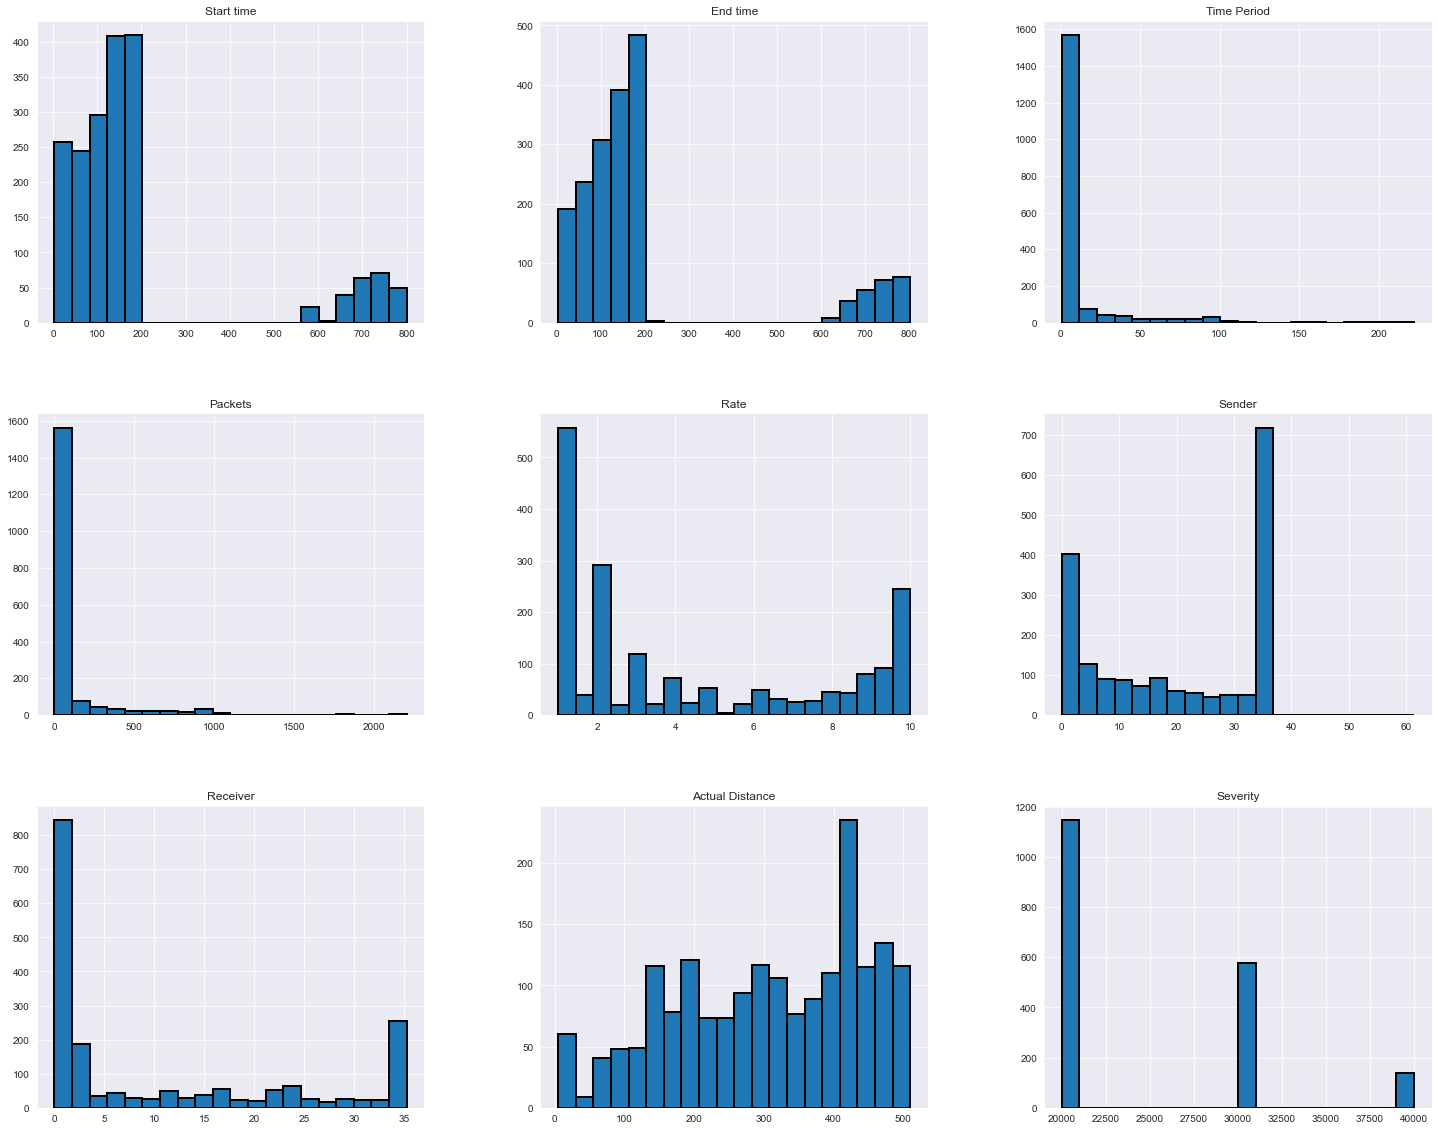

In [12]:
mergedDf.hist(bins=20, figsize=(25, 20), edgecolor='black', linewidth=2)
plt.show()

In [13]:
# n_time_steps = 7
# n_features = 6
# (n_features, n_time_steps)

In [14]:
mergedDf['Severity'].unique()

array([30000, 40000, 20000], dtype=int64)

In [15]:
mergedDf.shape

(1862, 9)

In [16]:
scaler = MinMaxScaler()
encoder = LabelBinarizer()

In [73]:
X = mergedDf[['Start time','End time','Time Period', 'Packets', 'Rate', 'Sender', 'Receiver', 'Actual Distance']]
Y = mergedDf.Severity
X.head()

,Start time,End time,Time Period,Packets,Rate,Sender,Receiver,Actual Distance
0,3,189,187,1859,9.941176,17.056668,34.451336,355.306833
1,3,189,187,1859,9.941176,19.017631,34.451336,109.731664
2,3,189,187,1859,9.941176,34.874903,34.451336,22.972370
3,3,96,94,936,9.957447,6.678918,32.171998,158.660533
4,3,3,1,3,3.000000,11.836256,0.782531,502.115994


In [74]:
Y.unique()

array([30000, 40000, 20000], dtype=int64)

In [75]:
X.shape

(1862, 8)

In [76]:
minMaxScaler = MinMaxScaler()

In [77]:
Y = pd.get_dummies(Y)
X = minMaxScaler.fit_transform(X)

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [79]:
print("X-train:", X_train.shape)
print("y-train:", Y_train.shape)
print("------------------------")
print("X-test:", X_test.shape)
print("y-test:", Y_test.shape)

X-train: (1489, 8)
y-train: (1489, 3)
------------------------
X-test: (373, 8)
y-test: (373, 3)


In [80]:
X_train.shape

(1489, 8)

In [81]:
X_train[0].shape

(8,)

In [82]:
X_train[:5]

array([[9.29736512e-01, 9.27500000e-01, 4.52488688e-03, 2.72108844e-03,
        2.77777778e-01, 5.00900850e-02, 8.88098323e-02, 1.79254857e-02],
       [2.50941029e-02, 1.28750000e-01, 3.75565611e-01, 3.77324263e-01,
        9.90740741e-01, 1.03854035e-01, 2.53430101e-01, 7.22666451e-01],
       [1.38017566e-01, 1.38750000e-01, 4.52488688e-03, 4.53514739e-04,
        0.00000000e+00, 3.19819377e-01, 6.32360829e-01, 6.94607359e-01],
       [1.83186951e-01, 1.82500000e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.64093332e-01, 9.77404128e-01, 6.30194026e-01],
       [1.60602258e-01, 1.81250000e-01, 7.69230769e-02, 7.75510204e-02,
        9.50617284e-01, 5.63950212e-01, 8.20642432e-06, 8.27076919e-01]])

In [83]:
Y_train[:5]

,20000,30000,40000
1790,1,0,0
244,1,0,0
710,1,0,0
1023,1,0,0
720,0,1,0


In [84]:
#X_train =X_train.reshape(-1,6,6)

In [85]:
#X_test = X_test.reshape(-1,6,1)

In [86]:
X_train.shape

(1489, 8)

In [87]:
X_train[0].shape

(8,)

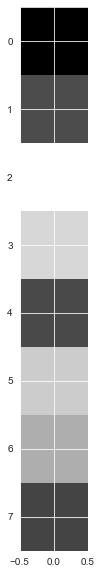

In [88]:
from PIL import Image

img = Image.fromarray(X_train[1], 'L')
plt.figure(figsize=(15, 10))
plt.imshow(img, 'gray')

In [89]:
model = Sequential([
    InputLayer(input_shape=(8,)),
    Dense(512, activation="relu"),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(3, activation="softmax")
])
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               4608      
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                

In [90]:
tf.keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [91]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, batch_size=1024)

Epoch 1/500
2/2 [==============================] - 2s 250ms/step - loss: 1.1131 - accuracy: 0.2639 - val_loss: 1.0120 - val_accuracy: 0.6676
Epoch 2/500
2/2 [==============================] - 0s 47ms/step - loss: 1.0102 - accuracy: 0.6044 - val_loss: 0.9127 - val_accuracy: 0.6676
Epoch 3/500
2/2 [==============================] - 0s 62ms/step - loss: 0.9319 - accuracy: 0.6031 - val_loss: 0.8328 - val_accuracy: 0.6676
Epoch 4/500
2/2 [==============================] - 0s 86ms/step - loss: 0.8750 - accuracy: 0.6031 - val_loss: 0.7809 - val_accuracy: 0.6676
Epoch 5/500
2/2 [==============================] - 0s 47ms/step - loss: 0.8603 - accuracy: 0.6031 - val_loss: 0.7508 - val_accuracy: 0.6676
Epoch 6/500
2/2 [==============================] - 0s 63ms/step - loss: 0.8428 - accuracy: 0.6031 - val_loss: 0.7297 - val_accuracy: 0.6676
Epoch 7/500
2/2 [==============================] - 0s 62ms/step - loss: 0.8116 - accuracy: 0.6064 - val_loss: 0.7192 - val_accuracy: 0.6810
Epoch 8/500
2/2 [==

In [326]:
history1 = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, batch_size=1024)

Epoch 1/500
2/2 [==============================] - 0s 105ms/step - loss: 0.0572 - accuracy: 0.9772 - val_loss: 0.1225 - val_accuracy: 0.9598
Epoch 2/500
2/2 [==============================] - 0s 85ms/step - loss: 0.0514 - accuracy: 0.9812 - val_loss: 0.1158 - val_accuracy: 0.9571
Epoch 3/500
2/2 [==============================] - 0s 64ms/step - loss: 0.0585 - accuracy: 0.9772 - val_loss: 0.1020 - val_accuracy: 0.9598
Epoch 4/500
2/2 [==============================] - 0s 58ms/step - loss: 0.0593 - accuracy: 0.9792 - val_loss: 0.1052 - val_accuracy: 0.9651
Epoch 5/500
2/2 [==============================] - 0s 48ms/step - loss: 0.0560 - accuracy: 0.9778 - val_loss: 0.1117 - val_accuracy: 0.9678
Epoch 6/500
2/2 [==============================] - 0s 46ms/step - loss: 0.0661 - accuracy: 0.9704 - val_loss: 0.1060 - val_accuracy: 0.9678
Epoch 7/500
2/2 [==============================] - 0s 48ms/step - loss: 0.0630 - accuracy: 0.9738 - val_loss: 0.1032 - val_accuracy: 0.9625
Epoch 8/500
2/2 [==

In [92]:
model.evaluate(X_test, Y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.1093 - accuracy: 0.9571


[0.10931070894002914, 0.9571045637130737]

In [93]:
model.save("/home/muzammil/PycharmProjects/Intrusion Detection in the Internet of Vehicles/models/VANET.h5")

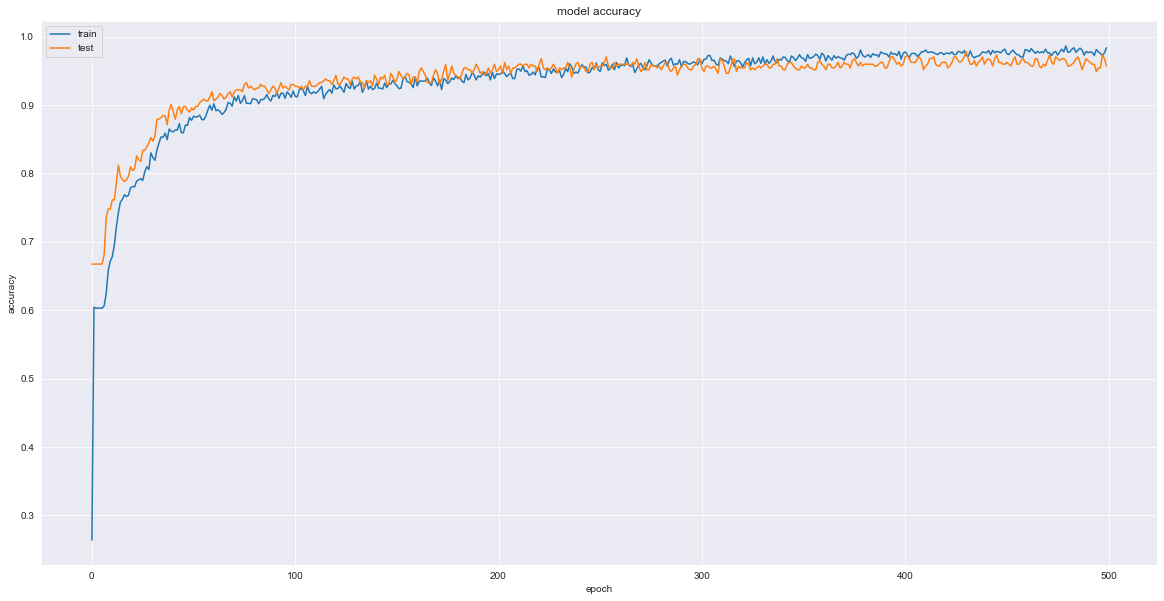

In [94]:
plt.figure(figsize=(20, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

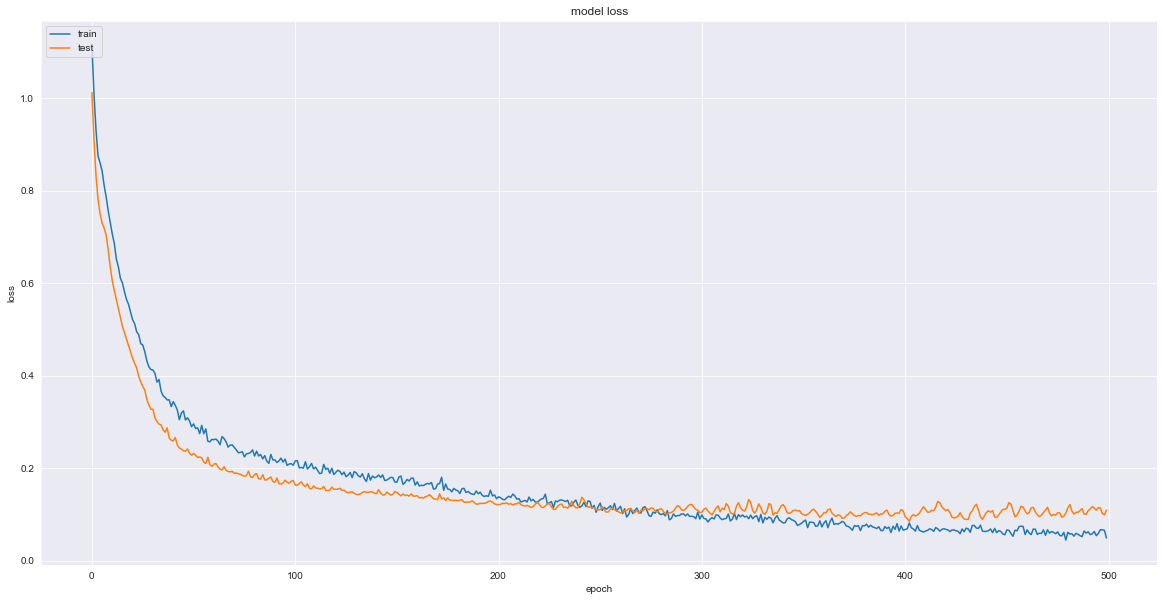

In [95]:
plt.figure(figsize=(20, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [96]:
model = tf.keras.models.load_model("D:\PycharmProjects\Intrusion Detection in the Internet of Vehicles\models\VANET.h5")

In [99]:
y_pred = model.predict(X_test)
y_obs = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

12/12 [==============================] - 0s 1ms/step


In [100]:
from sklearn.metrics import confusion_matrix

test_acc = accuracy_score(y_true, y_obs)
cm = confusion_matrix(y_true, y_obs)

print("Test Accuracy: ", test_acc)
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

TypeError: Singleton array 0 cannot be considered a valid collection.

In [37]:

print(classification_report(y_true, y_obs))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       249
           1       0.92      0.94      0.93       101
           2       0.90      0.78      0.84        23

    accuracy                           0.96       373
   macro avg       0.94      0.90      0.92       373
weighted avg       0.96      0.96      0.96       373



In [107]:
prediction_labels = []
for i in y_pred:
    prediction_labels.append(np.argmax(i))

In [103]:
Y_test

,20000,30000,40000
233,1,0,0
530,1,0,0
1220,1,0,0
471,0,1,0
415,1,0,0
...,...,...,...
438,1,0,0
506,1,0,0
593,1,0,0
271,1,0,0


In [108]:
prediction_labels

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,


In [104]:
np.unique(prediction_labels)

array([0, 1, 2], dtype=int64)

In [110]:
labels ={2:"High",1:"Medium",0:"Low"}

In [111]:
predictions =[]
for i in prediction_labels:
    predictions.append(labels.get(i))
predictions

['Low',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'High',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'High',
 'Low',
 'Low',
 'Low',
 'High',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Medium',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'Low',
 'Low',
 'Low',
 'Low',
 'Low',
 'Medium',
 'High',
 'Me

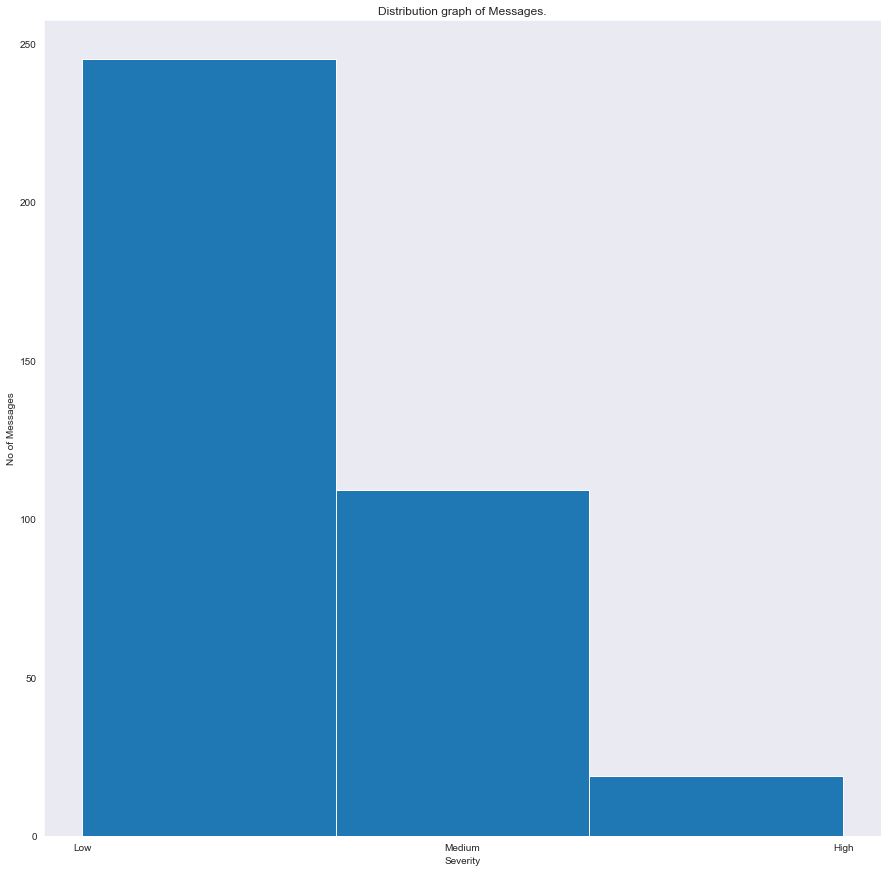

In [115]:
plt.figure(figsize=(15,15))
plt.grid()
plt.title("Distribution graph of Messages.")
plt.xlabel("Severity")
plt.ylabel("No of Messages")
plt.hist(predictions, bins=3)
plt.show()

In [385]:
print("ann")
cm

ann


array([[246,   3,   0],
       [  4,  95,   2],
       [  0,   5,  18]])

In [356]:
X = mergedDf[['Start time','End time','Time Period', 'Packets', 'Rate', 'Sender', 'Receiver', 'Actual Distance']]
Y = mergedDf.Severity

In [357]:
#Y = encoder.fit_transform(Y)
X = minMaxScaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [377]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)

0.8927613941018767

Test Accuracy:  0.8927613941018767


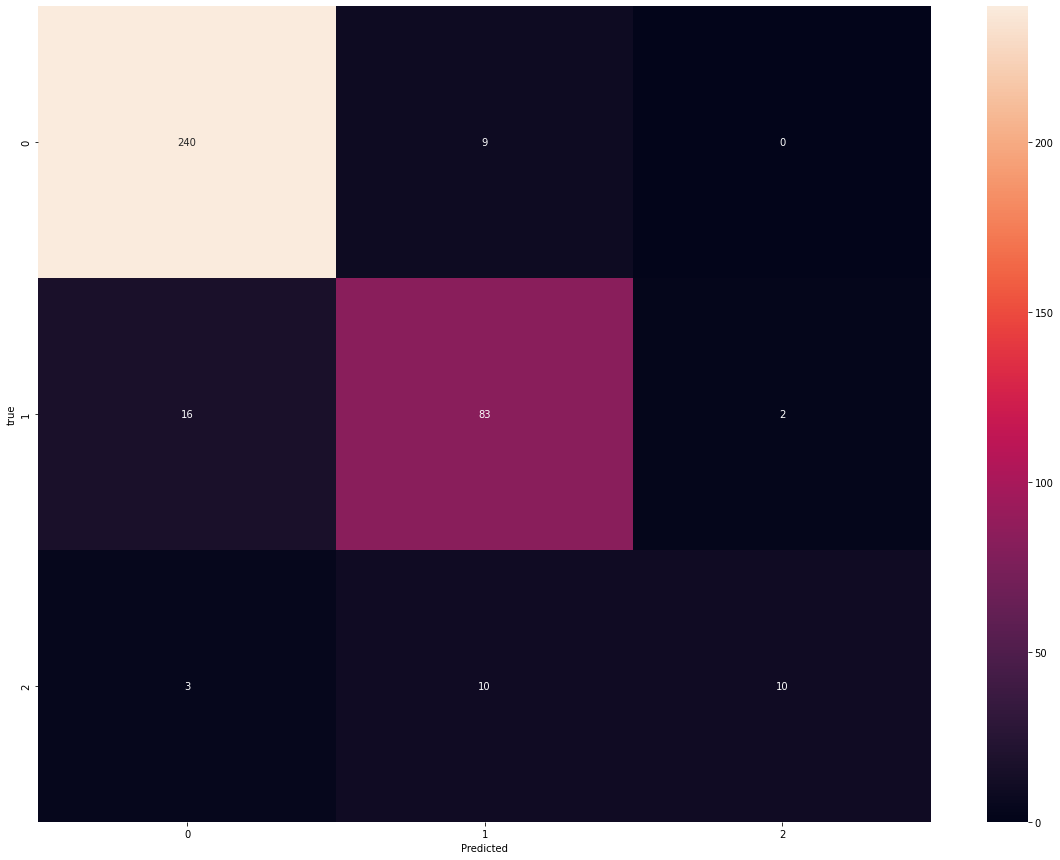

In [378]:
y_pred = svc.predict(X_test)

test_acc = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

print("Test Accuracy: ", test_acc)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

In [379]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       20000       0.93      0.96      0.94       249
       30000       0.81      0.82      0.82       101
       40000       0.83      0.43      0.57        23

    accuracy                           0.89       373
   macro avg       0.86      0.74      0.78       373
weighted avg       0.89      0.89      0.89       373



In [380]:
print("svc ")
cm

svc 


array([[240,   9,   0],
       [ 16,  83,   2],
       [  3,  10,  10]])

In [373]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, Y_train)
decisionTree.score(X_test, Y_test)

0.9142091152815014

Test Accuracy:  0.9142091152815014


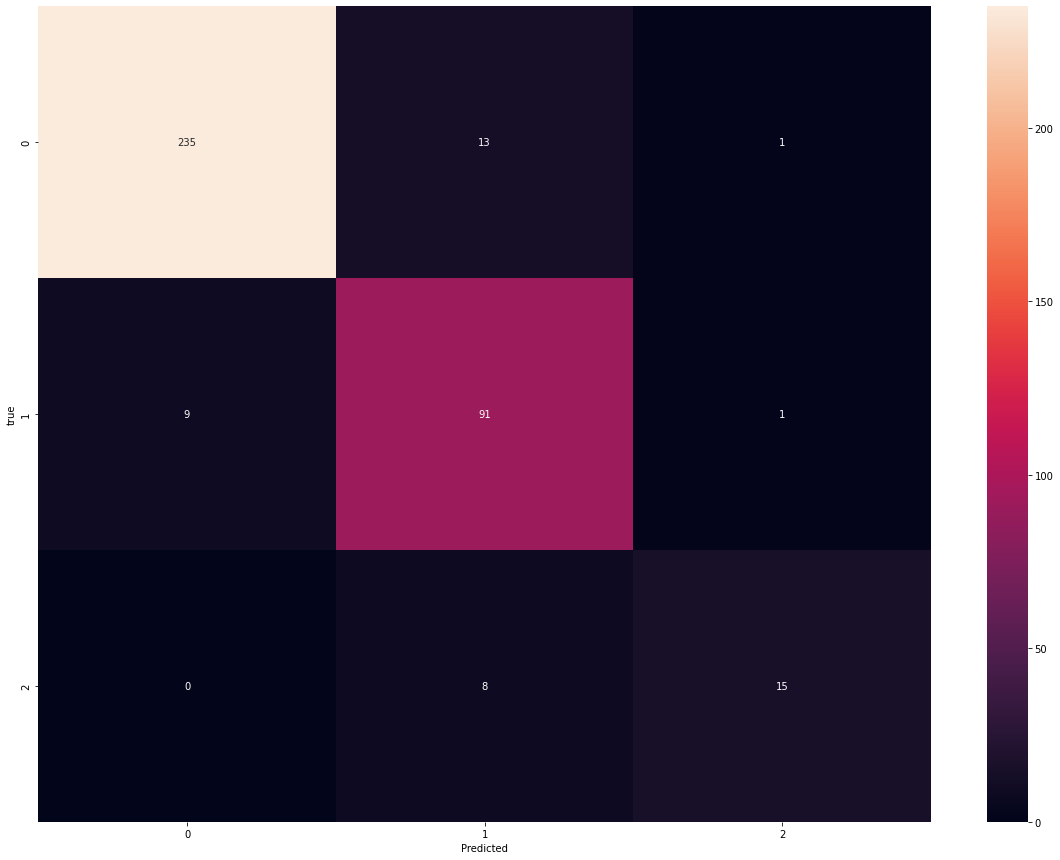

In [374]:
y_pred = decisionTree.predict(X_test)

test_acc = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

print("Test Accuracy: ", test_acc)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

In [375]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       20000       0.96      0.94      0.95       249
       30000       0.81      0.90      0.85       101
       40000       0.88      0.65      0.75        23

    accuracy                           0.91       373
   macro avg       0.89      0.83      0.85       373
weighted avg       0.92      0.91      0.91       373



In [376]:
print("decision tree")
cm

decision tree


array([[235,  13,   1],
       [  9,  91,   1],
       [  0,   8,  15]])

In [369]:
from sklearn.naive_bayes import BernoulliNB

modelNB = BernoulliNB()
modelNB.fit(X_train, Y_train)
modelNB.score(X_test, Y_test)

0.67828418230563

Test Accuracy:  0.67828418230563


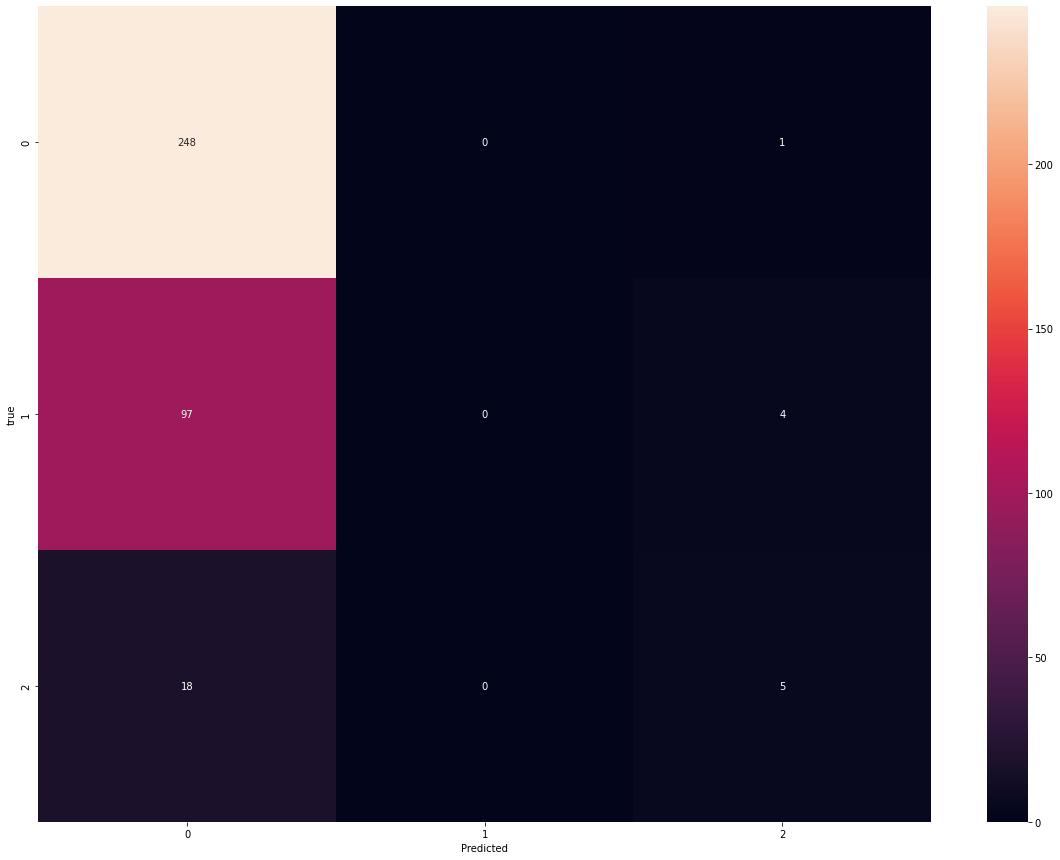

In [370]:
y_pred = modelNB.predict(X_test)

test_acc = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

print("Test Accuracy: ", test_acc)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

In [371]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       20000       0.68      1.00      0.81       249
       30000       0.00      0.00      0.00       101
       40000       0.50      0.22      0.30        23

    accuracy                           0.68       373
   macro avg       0.39      0.40      0.37       373
weighted avg       0.49      0.68      0.56       373



/home/muzammil/Python_programs/PycharmProjects/ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muzammil/Python_programs/PycharmProjects/ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muzammil/Python_programs/PycharmProjects/ML/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [372]:
print("bernoulli NB")
cm

bernoulli NB


array([[248,   0,   1],
       [ 97,   0,   4],
       [ 18,   0,   5]])

In [364]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
RF.score(X_test, Y_test)

0.9276139410187667

Test Accuracy:  0.9276139410187667


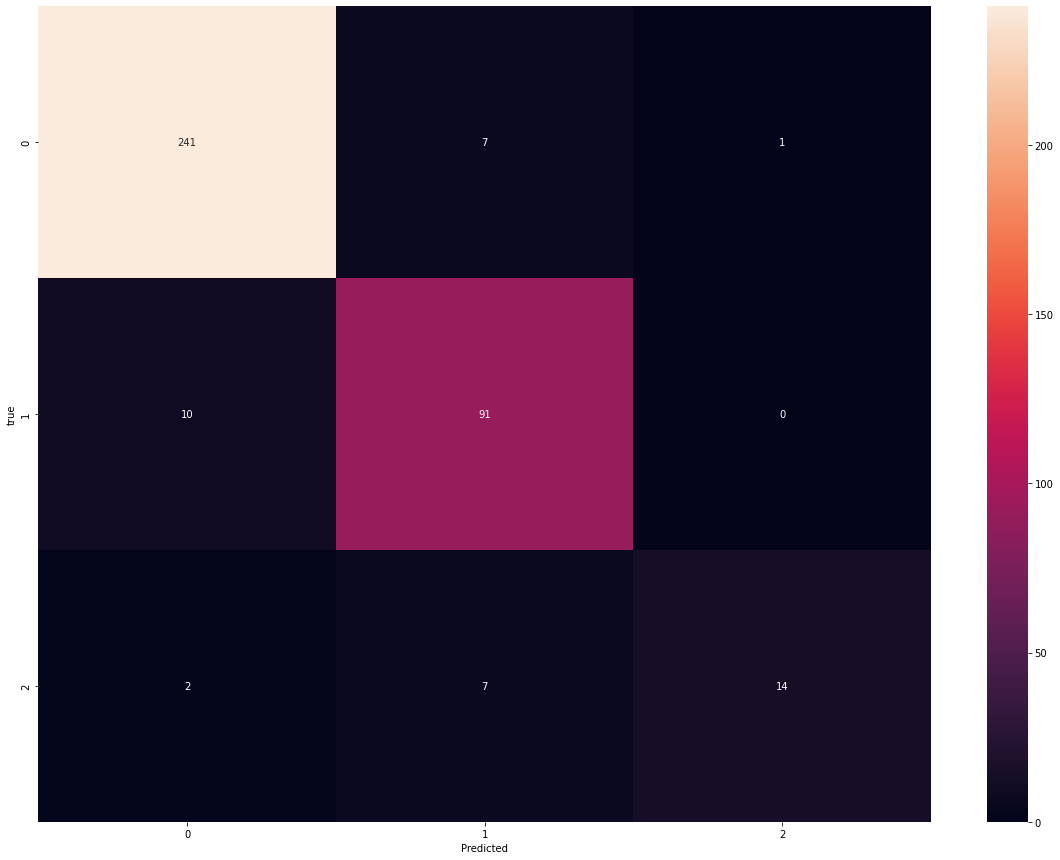

In [365]:
y_pred = RF.predict(X_test)

test_acc = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

print("Test Accuracy: ", test_acc)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

In [366]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       20000       0.95      0.97      0.96       249
       30000       0.87      0.90      0.88       101
       40000       0.93      0.61      0.74        23

    accuracy                           0.93       373
   macro avg       0.92      0.83      0.86       373
weighted avg       0.93      0.93      0.93       373



In [368]:
print("random forest")
cm

random forest


array([[241,   7,   1],
       [ 10,  91,   0],
       [  2,   7,  14]])

In [360]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, Y_train)
LR.score(X_test, Y_test)

0.8096514745308311

Test Accuracy:  0.8096514745308311


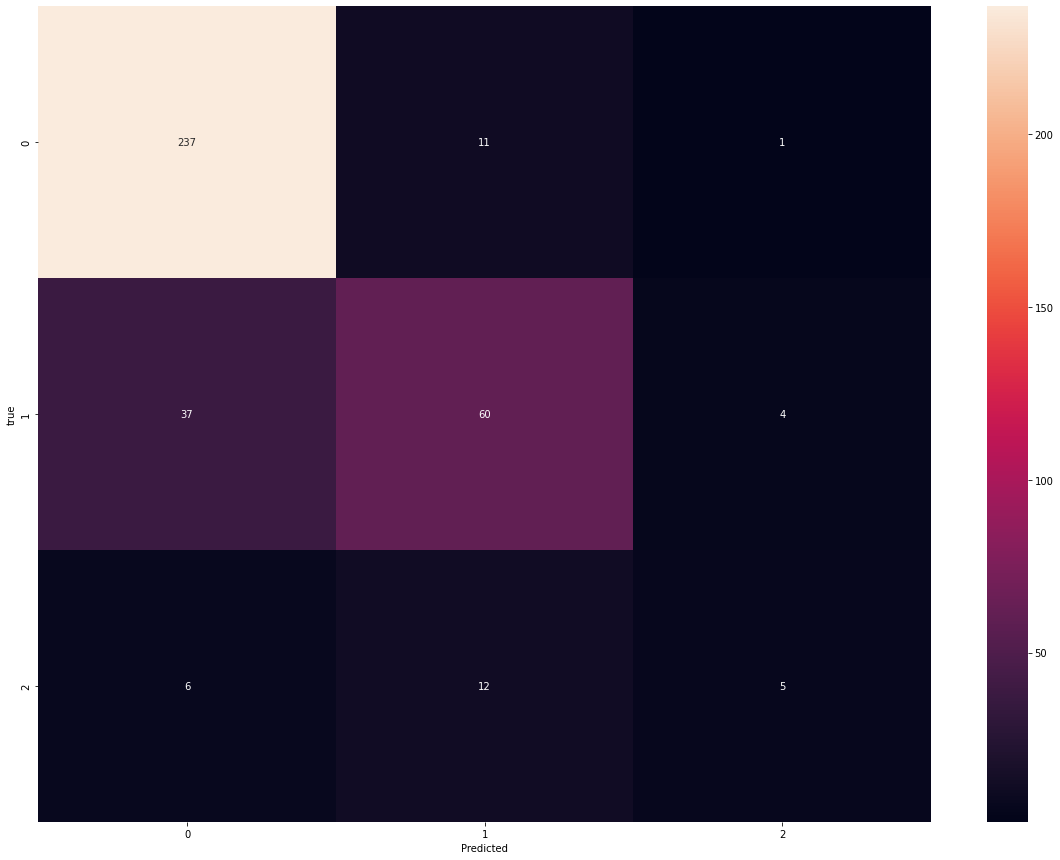

In [361]:
y_pred = LR.predict(X_test)

test_acc = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

print("Test Accuracy: ", test_acc)
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()

In [362]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       20000       0.85      0.95      0.90       249
       30000       0.72      0.59      0.65       101
       40000       0.50      0.22      0.30        23

    accuracy                           0.81       373
   macro avg       0.69      0.59      0.62       373
weighted avg       0.79      0.81      0.79       373



In [363]:
cm

array([[237,  11,   1],
       [ 37,  60,   4],
       [  6,  12,   5]])

In [ ]:
import rembag